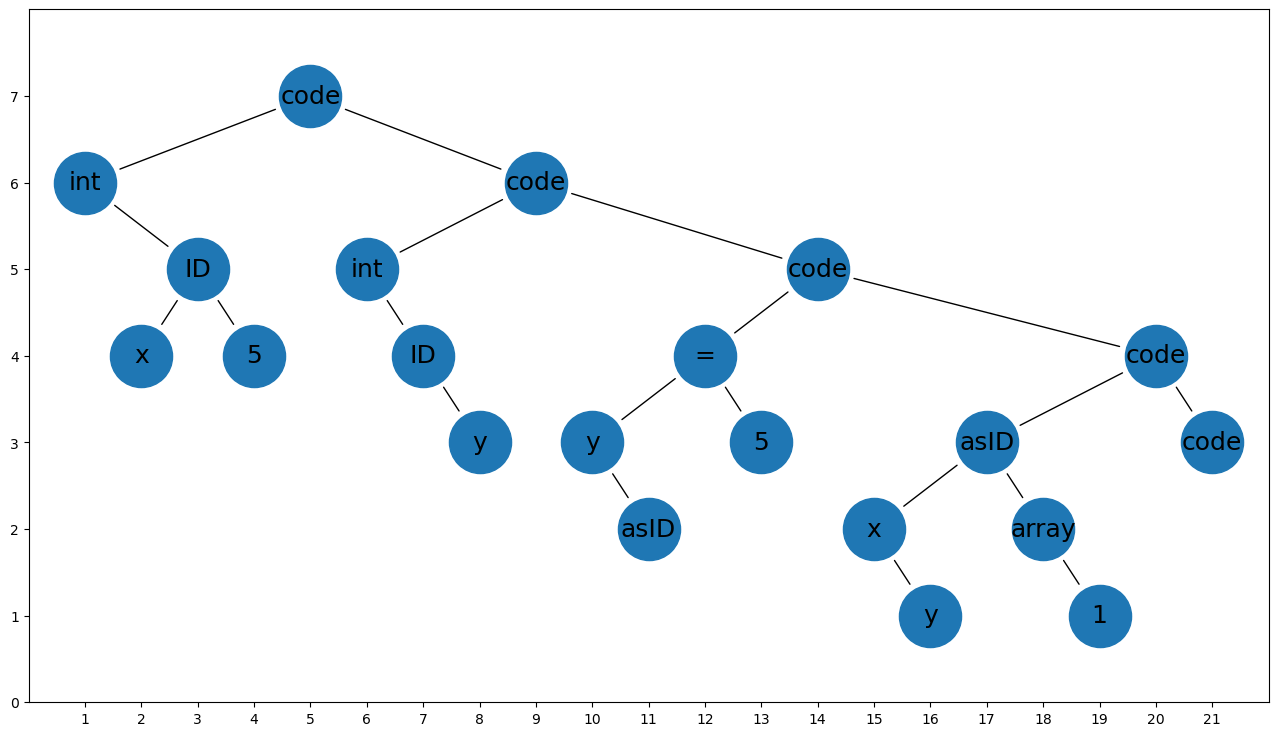

----------------------------------------------------------------------------------------------------
dec1 = x size:  5
dec2 = y
y = 5
x[y] = 1
----------------------------------------------------------------------------------------------------


Quadruples


In [8]:
%run "MurrayIntCodeGe.ipynb"

In [9]:
def code_gen(Q):
    """Code Generator printing MASM Assembly Code
    
        input: Quadruple Q = [x, y, op, z] 
                representing Three-address code:
                            x = y op z
        output: string of target code in MASM
    """
    
    x = Q[0]
    y = Q[1]
    op = Q[2]
    z = Q[3]
    target = ""
    
    if "while" in x:
        if op == ">=" or op == "=>": #conditional jump to out label
            target += "JGE " +str(x)+"\n"
        elif op == ">": 
            target += "JG " +str(x)+"\n"
        elif op == "<=" or op == "=<": 
            target += "JLE "+str(x)+"\n"
        elif op == "<": 
            target += "JL " +str(x)+"\n"
        elif op == "==":
            target += "JE " +str(x) + "\n"
        
        if op == ">=":
            target += "JGE " + str(x)+"\n" #need some conditional jump
    elif "out_f" in x:
        target += "MOV "+"R8, "+str(y)+"\n"
        target += "MOV "+"R9, "+str(z)+"\n"
        target += "CMP R8, R9\n"
        
        if op == ">=" or op == "=>": #conditional jump to out label
            target += "JGE " +str(x)+"\n"
        elif op == ">": 
            target += "JG " +str(x)+"\n"
        elif op == "<=" or op == "=<": 
            target += "JLE " +str(x)+"\n"
        elif op == "<": 
            target += "JL " +str(x)+"\n"
        elif op == "==":
            target += "JE " +str(x) + "\n"
    elif "false_label" in x:
        target += "MOV "+"R8, "+str(y)+"\n"
        target += "MOV "+"R9, "+str(z)+"\n"
        target += "CMP R8, R9\n"
        
        if op == ">=" or op == "=>": #conditional jump to out label
            target += "JGE " + str(x)+"\n"
        elif op == ">": 
            target += "JG " + str(x)+"\n"
        elif op == "<=" or op == "=<": 
            target += "JLE " +str(x)+"\n"
        elif op == "<": 
            target += "JL " +str(x)+"\n"
        elif op == "==":
            target += "JE " +str(x) + "\n"
    elif "outw" in x:
        target += "MOV "+"R8, "+str(y)+"\n"
        target += "MOV "+"R9, "+str(z)+"\n"
        target += "CMP R8, R9\n"
        
        if op == ">=" or op == "=>": #conditional jump to out label
            target += "JGE " + str(x)+"\n"
        elif op == ">": 
            target += "JG " +str(x)+"\n"
        elif op == "<=" or op == "=<": 
            target += "JLE " +str(x)+"\n"
        elif op == "<": 
            target += "JL " +str(x)+"\n"
        elif op == "==":
            target += "JE " +str(x) + "\n"
            
    if op=="+":                            # Addition
        target += "MOV "+"R8, "+str(y)+"\n"
        target += "MOV "+"R9, "+str(z)+"\n"
        target += "ADD R8, R9\n"
        target += "MOV "+str(x)+", R8\n"
    elif op=="-":                          # Subtraction x = y - z
        target += "MOV "+"R8, "+str(y)+"\n"
        target += "MOV "+"R9, "+str(z)+"\n"
        target += "SUB R8, R9\n"
        target += "MOV "+str(x)+", R8\n"
    
    elif op=="*":                          # Multiplication x = y * z
        target += "MOV "+"rax, "+str(y)+"\n"
        target += "MOV "+"R8, "+str(z)+"\n"
        target += "IMUL R8\n"
        target += "MOV "+str(x)+", rax\n"
    
    elif op=="/":                         # Division x = y / z
        target += "xor rdx, rdx\n"
        target += "xor rax, rax\n"
        target += "MOV "+"rax, "+str(y)+"\n"
        target += "MOV "+"R8, "+str(z)+"\n"
        target += "IDIV R8\n"
        target += "MOV "+str(x)+", rax\n"
    elif op == '=':
        #---------Assignment Statement -- Array----------------------
        if type(z) != str:                                    # constant on right
            target += "IMUL RAX, RAX, "+ str(z) + "\n"
            target += "MOV QWORD PTR "+ "[rbp + "+ str((z)*8)+"],"+str(y)+"\n"
        else:
            target += "IMUL RAX, RAX, "+ str(z) + "\n"
            target += "MOV ECX, QWORD PTR ["+ str(z) +"]\n"
            target += "MOV QWORD PTR "+ str(x) + "[rax],"+ "ECX\n"
    
    elif op == "NA":
        print(x,"=",y,"","")#---------Assignment Statement----------------------
        if type(y) != str:                                    # constant on right
            target += "MOV "+str(x)+", "+str(y)+"\n"
        else:
            target += "MOV R8, "+str(y)+"\n"                  # variable on right
            target += "MOV "+str(x)+", R8\n"
    
    elif x == "label":#----------------Label Statement---------------------------
        target += str(y)+':'+'\n'
    elif y == "label":
        if "for" in x:
            target += "JMP " + str(x) + "\n"
        elif "while" in x:
            target += "JMP " + str(x) + "\n"
        elif "out_if" in x:
            target += "JMP " + str(x) + "\n"
    elif y == 'int':
        if type(z) == int:
            target += "MOV QWORD PTR ["+str(x)+"], 0\n"
            target += "LEA rbp, "+str(x)+"\n"
            bit = 0
            for e in range(z-1):
                target += "MOV QWORD PTR [rbp + " + str(bit) + "], 0\n"
                bit += 8
    print(target)
    return target

In [10]:
global quad #import quadruples from int code gen
i = 0
for tupl in quad: #convert from list of lists to just lists
    print(tupl)
    code_gen(tupl) #generate code for each tuple


['x', 'int', None, 5]
MOV QWORD PTR [x], 0
LEA rbp, x
MOV QWORD PTR [rbp + 0], 0
MOV QWORD PTR [rbp + 8], 0
MOV QWORD PTR [rbp + 16], 0
MOV QWORD PTR [rbp + 24], 0

['y', 'int', None, None]

['y', 5, 'NA', 'NA']
y = 5  
MOV y, 5

['x', 1, '=', 'y']
IMUL RAX, RAX, y
MOV ECX, QWORD PTR [y]
MOV QWORD PTR x[rax],ECX

